In [1]:
# this follows the examples from Francois Chollet's blot post https://blog.keras.io/building-autoencoders-in-keras.html

from keras import regularizers
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32   # this is the size of our encoded representations
input_img = Input(shape=(784,)) # this is our input placeholder
encoded = Dense(encoding_dim, 
                activation='relu',
                activity_regularizer=regularizers.l1(1e-6)
               )(input_img) # "encoded" is the encoded representation of the input
decoded = Dense(784, 
                activation='sigmoid'
               )(encoded) # "decoded" is the lossy reconstruction of the input
autoencoder = Model(input_img, decoded) # this model maps an input to its reconstruction

encoder = Model(input_img, encoded) # this model maps an input to its encoded representation
encoded_input = Input(shape=(encoding_dim,)) # create a placeholder for an encoded (32-dimensional) input
decoder_layer = autoencoder.layers[-1] # retrieve the last layer of the autoencoder model
decoder = Model(encoded_input, decoder_layer(encoded_input)) # create the decoder model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# import MNIST data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

# scale inputs to lie in [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

Using TensorFlow backend.


(60000, 784)
(10000, 784)


In [2]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')] 
               )

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.3751 - val_loss: 0.2893
Epoch 2/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.2803 - val_loss: 0.2696
Epoch 3/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.2609 - val_loss: 0.2505
Epoch 4/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.2438 - val_loss: 0.2349
Epoch 5/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.2301 - val_loss: 0.2229
Epoch 6/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.2198 - val_loss: 0.2140
Epoch 7/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.2118 - val_loss: 0.2069
Epoch 8/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.2055 - val_loss: 0.2012
Epoch 9/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.2003 - val_loss: 0.1

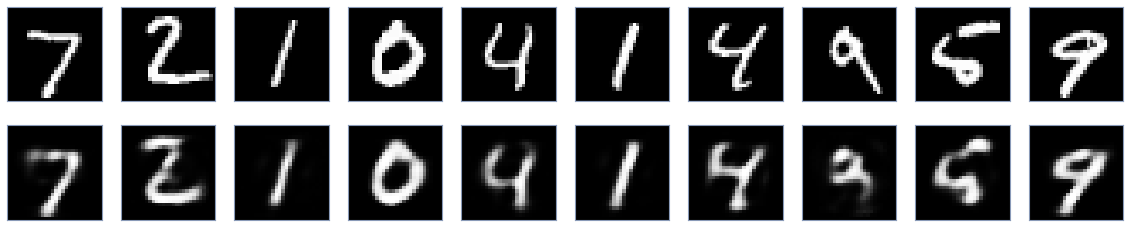

In [4]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()